In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn 


In [299]:
df=pd.read_csv("smartcart_customers.csv")

In [300]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,172,88,88,3,8,10,4,7,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,2,1,6,2,1,1,2,5,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,111,21,42,1,8,2,10,4,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,10,3,5,2,2,0,4,6,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,46,27,15,5,5,3,6,5,0,0


In [301]:
df.shape

(2240, 22)

In [302]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Complain                0
Response                0
dtype: int64

# Data Preprocessing 

1.Handle Missing Values

In [303]:
df["Income"]=df["Income"].fillna(df["Income"].median())

In [304]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,172,88,88,3,8,10,4,7,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,2,1,6,2,1,1,2,5,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,111,21,42,1,8,2,10,4,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,10,3,5,2,2,0,4,6,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,46,27,15,5,5,3,6,5,0,0


# Feature Engineering

In [305]:
#Birthday to age 
df["Age"]=2026-df["Year_Birth"]

In [306]:
# Customer joining Date 
df["Dt_Customer"]=pd.to_datetime(df["Dt_Customer"],dayfirst=True)

reference_date=df["Dt_Customer"].max()

df["Customer_Tenure_Days"]=(reference_date-df["Dt_Customer"]).dt.days

In [307]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,88,3,8,10,4,7,0,1,69,663
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,6,2,1,1,2,5,0,0,72,113
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,42,1,8,2,10,4,0,0,61,312
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,5,2,2,0,4,6,0,0,42,139
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,15,5,5,3,6,5,0,0,45,161


In [308]:
# Spending 

df["Total_Spending"]=df["MntWines"]+df["MntFruits"]+df["MntMeatProducts"]+df["MntFishProducts"]+df["MntSweetProducts"]+df["MntGoldProds"]

In [309]:
# Children
df["Total_Children"]=df["Kidhome"]+df["Teenhome"]

In [310]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_Spending,Total_Children
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,8,10,4,7,0,1,69,663,1617,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,1,2,5,0,0,72,113,27,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,8,2,10,4,0,0,61,312,776,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,2,0,4,6,0,0,42,139,53,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,3,6,5,0,0,45,161,422,1


In [311]:
# Eduction


df["Education"]=df["Education"].replace({
    "Basic":"UnderGraduate",
    "2n Cycle":"UnderGraduate",
    "Graduation":"Graduate",
    "Master":"PostGraduate",
    "PhD":"PostGraduate"
    
})

#UnderGraduate,Graduate,PostGraduate 

In [312]:
df["Education"].value_counts()

Education
Graduate         1127
PostGraduate      856
UnderGraduate     257
Name: count, dtype: int64

In [313]:
# Marital Status 
df["Marital_Status"].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [314]:
df["Living_With"]=df["Marital_Status"].replace({
    "Married":"Partner",
    "Together":"Partner",
    "Single":"Alone",
    "Divorced":"Alone",
    "Widow":"Alone",
    "Absurd":"Alone",
    "YOLO":"Alone"
    
})

In [315]:
df["Living_With"].value_counts()

Living_With
Partner    1444
Alone       796
Name: count, dtype: int64

# Drop columns which are not useful for clustering

In [316]:
cals=["ID","Year_Birth","Marital_Status","Kidhome","Teenhome","Dt_Customer"]
spending_cols=["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]
cols_to_drop=cals+spending_cols

df_cleaned=df.drop(columns=cols_to_drop)

In [317]:
df_cleaned.shape

(2240, 15)

In [318]:
df.shape

(2240, 27)

In [319]:
df_cleaned.head()

,Education,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_Spending,Total_Children,Living_With
0,Graduate,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,Alone
1,Graduate,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,Alone
2,Graduate,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,Partner
3,Graduate,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,Partner
4,PostGraduate,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,Partner


# Outliers Detection and Removal

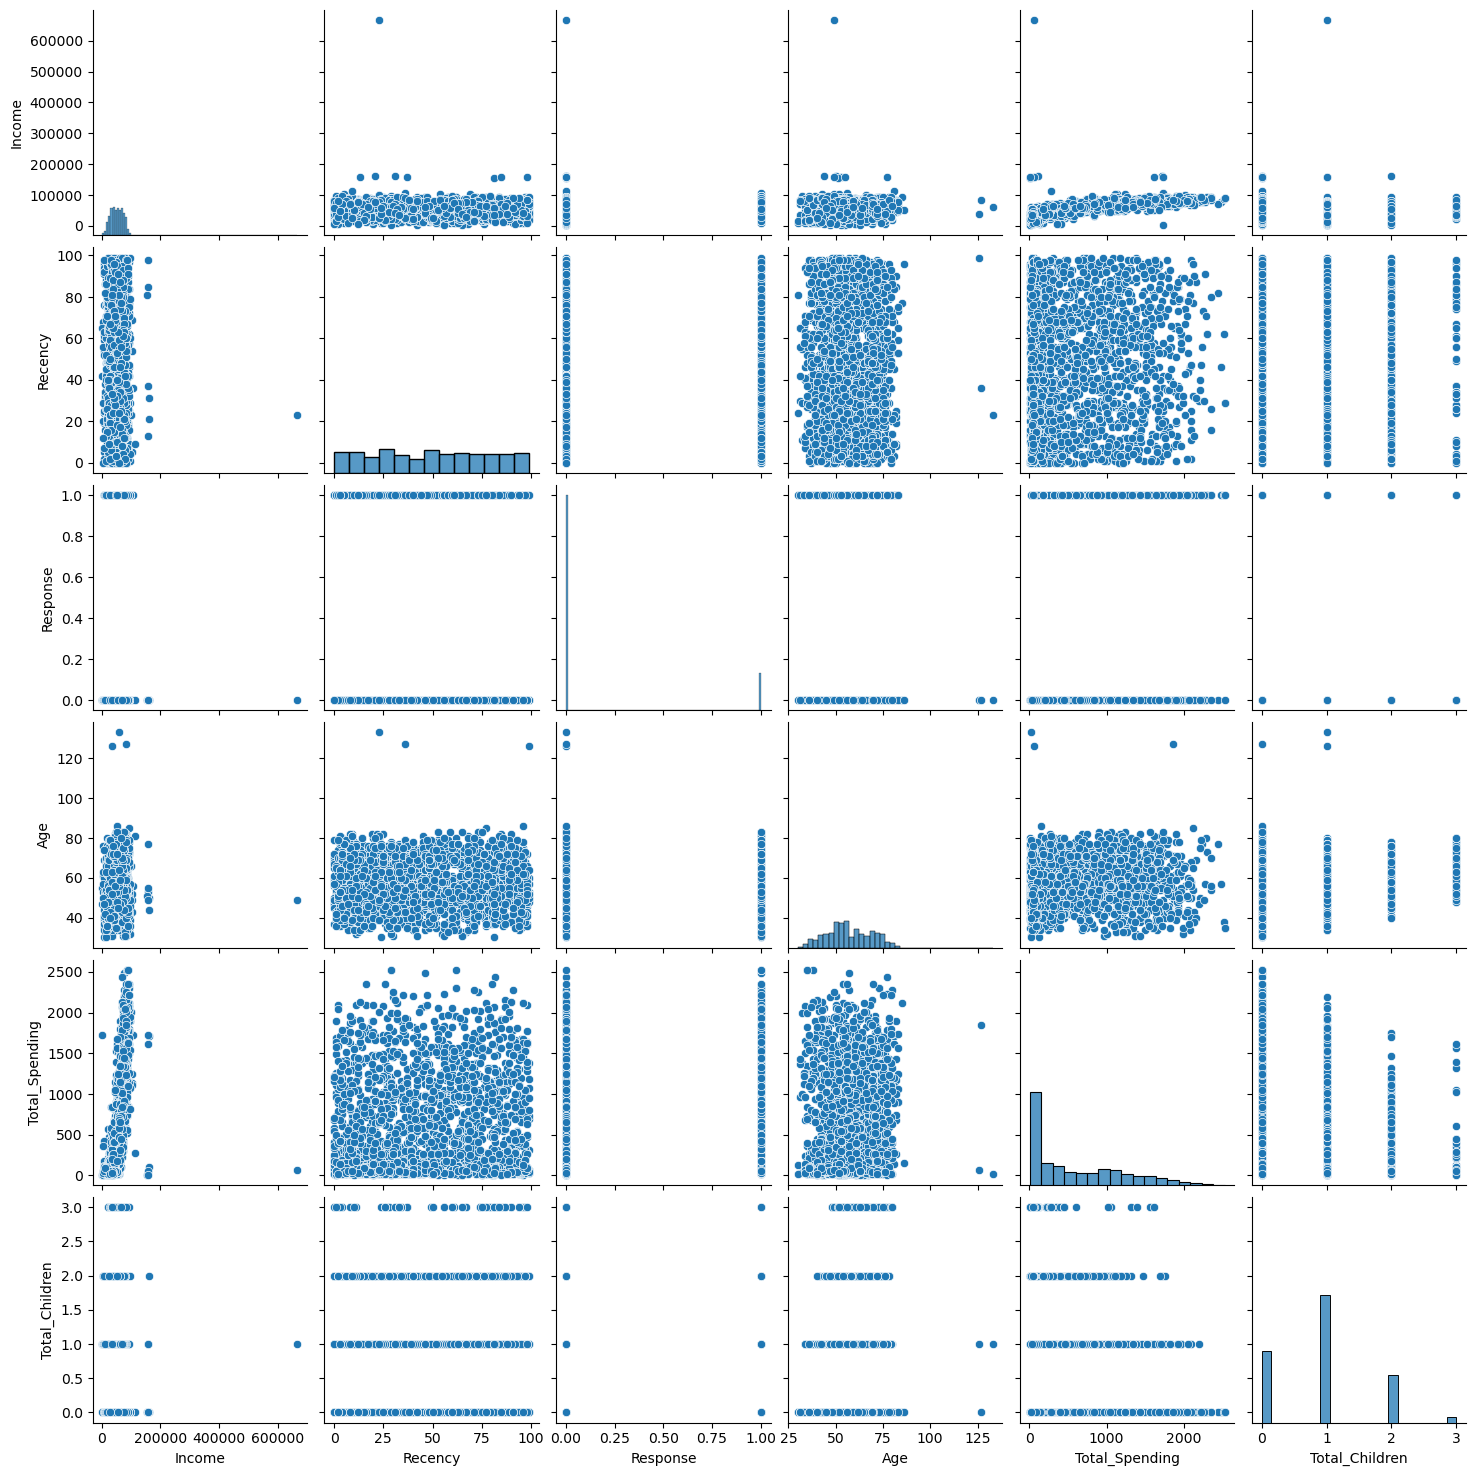

In [320]:
cols=["Income","Recency","Response","Age","Total_Spending","Total_Children"]
sns.pairplot(df_cleaned[cols])
plt.show()

In [321]:
# Remove outliers 
print("Data size with outliers:",len(df_cleaned))

df_cleaned=df_cleaned[df_cleaned["Age"]<90]
df_cleaned=df_cleaned[df_cleaned["Income"]<600_000]


print("Data size after removing outliers:",len(df_cleaned))

Data size with outliers: 2240
Data size after removing outliers: 2236


# Headmap of Correlation Matrix

In [322]:
corr=df_cleaned.corr(numeric_only=True)

In [323]:
corr

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_Spending,Total_Children
Income,1.000000,0.007829,-0.107169,0.450584,0.693781,0.628075,-0.646382,-0.027871,0.161121,0.198835,-0.023677,0.789375,-0.340550
Recency,0.007829,1.000000,-0.000638,-0.010776,0.025226,0.000771,-0.021850,0.005361,-0.198781,0.019396,0.024238,0.020842,0.017826
NumDealsPurchases,-0.107169,-0.000638,1.000000,0.233971,-0.008510,0.068418,0.347216,0.003636,0.002017,0.068286,0.218009,-0.064831,0.439682
NumWebPurchases,0.450584,-0.010776,0.233971,1.000000,0.378049,0.502227,-0.056204,-0.013250,0.148390,0.153873,0.191211,0.519948,-0.146429
NumCatalogPurchases,0.693781,0.025226,-0.008510,0.378049,1.000000,0.518788,-0.520376,-0.018304,0.220813,0.125285,0.095836,0.778343,-0.439631
NumStorePurchases,0.628075,0.000771,0.068418,0.502227,0.518788,1.000000,-0.429857,-0.011563,0.038702,0.139237,0.109727,0.675460,-0.321729
NumWebVisitsMonth,-0.646382,-0.021850,0.347216,-0.056204,-0.520376,-0.429857,1.000000,0.020796,-0.004397,-0.117498,0.272105,-0.499909,0.417908
Complain,-0.027871,0.005361,0.003636,-0.013250,-0.018304,-0.011563,0.020796,1.000000,0.000167,0.004450,0.035685,-0.033784,0.031480
Response,0.161121,-0.198781,0.002017,0.148390,0.220813,0.038702,-0.004397,0.000167,1.000000,-0.018557,0.194232,0.265615,-0.169451
Age,0.198835,0.019396,0.068286,0.153873,0.125285,0.139237,-0.117498,0.004450,-0.018557,1.000000,-0.016451,0.113618,0.095512


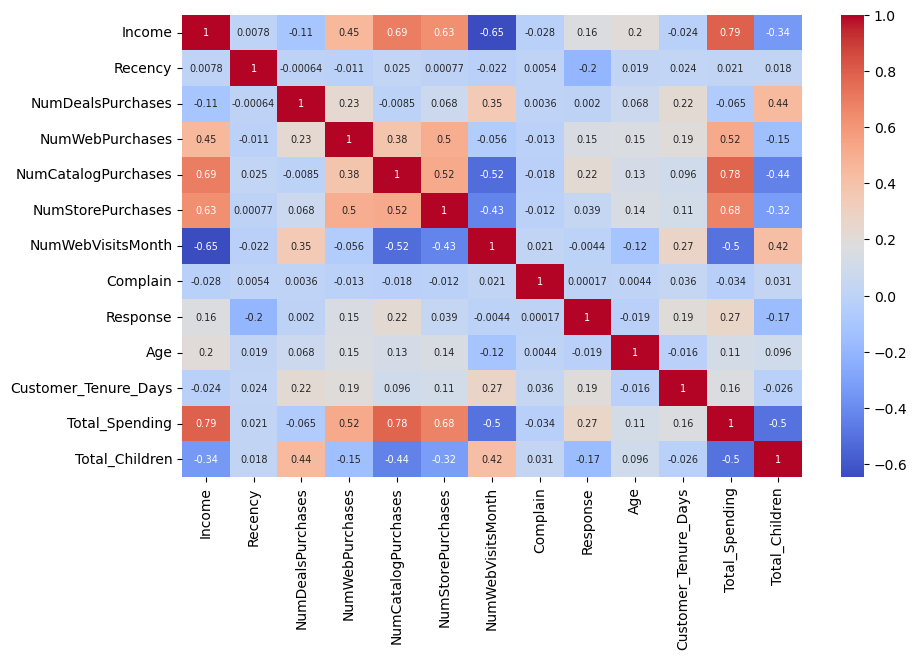

In [324]:
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True,annot_kws={"size": 7},cmap="coolwarm")
plt.show()

In [325]:
# Encoding Categorical 
from sklearn.preprocessing import OneHotEncoder

In [326]:
ohe=OneHotEncoder()
cat_cols=["Education","Living_With"]
enc_cols=ohe.fit(df_cleaned[cat_cols])

In [327]:
enc_df=pd.DataFrame(
	ohe.transform(df_cleaned[cat_cols]).toarray(),
	columns=ohe.get_feature_names_out(cat_cols),
	index=df_cleaned.index
)

In [328]:
enc_df.head()

,Education_Graduate,Education_PostGraduate,Education_UnderGraduate,Living_With_Alone,Living_With_Partner
0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0


In [329]:
df_encoded=pd.concat([df_cleaned.drop(columns=cat_cols),enc_df],axis=1)

In [330]:
df_encoded.shape

(2236, 18)

In [331]:
df_encoded.head()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_Spending,Total_Children,Education_Graduate,Education_PostGraduate,Education_UnderGraduate,Living_With_Alone,Living_With_Partner
0,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,1.0,0.0,0.0,1.0,0.0
1,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,1.0,0.0,0.0,1.0,0.0
2,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,1.0,0.0,0.0,0.0,1.0
3,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,1.0,0.0,0.0,0.0,1.0
4,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,0.0,1.0,0.0,0.0,1.0


# Scaling the data

In [332]:
from sklearn.preprocessing import StandardScaler

In [333]:
X=df_encoded

In [334]:
scaler=StandardScaler()

x_scaled=scaler.fit_transform(X)

# Visualize


In [335]:
x_scaled.shape

(2236, 18)

In [336]:
#2D
from sklearn.decomposition import PCA


In [337]:
pca=PCA(n_components=3)

X_pca=pca.fit_transform(x_scaled)

In [338]:
pca.explained_variance_ratio_

array([0.23163158, 0.11385454, 0.10405815])

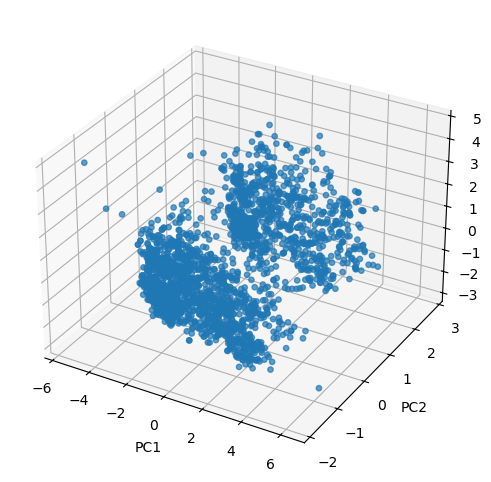

In [339]:
#plot
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111,projection="3d")
ax.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,2],s=15,alpha=0.7)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()

In [340]:
pca.explained_variance_ratio_

array([0.23163158, 0.11385454, 0.10405815])

# Aanlyze K value 
 1. Elbow Method

In [341]:
from sklearn.cluster import KMeans
from kneed import KneeLocator 
wcss=[]

for k in range(1,11):
    Kmeans=KMeans(n_clusters=k,random_state=42)
    Kmeans.fit_predict(X_pca)
    wcss.append(Kmeans.inertia_)

In [342]:
knee=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")
optimal_k=knee.elbow

In [343]:
print("best K=",optimal_k)

best K= 4


Text(0, 0.5, 'wcss')

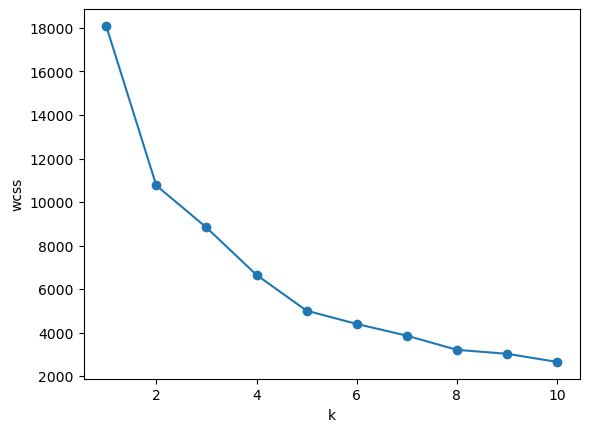

In [344]:
# plot 
plt.plot(range(1,11),wcss,marker='o')
plt.xlabel("k")
plt.ylabel("wcss")

## Clustering using KMeans

Text(0, 0.5, 'silhouette score')

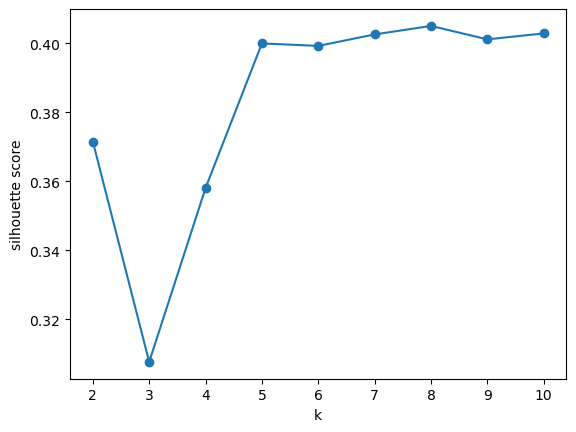

In [345]:
from sklearn.metrics import silhouette_score

scores=[]

for k in range(2,11):
    Kmeans=KMeans(n_clusters=k,random_state=42)
    labels=Kmeans.fit_predict(X_pca)
    score=silhouette_score(X_pca,labels)
    scores.append(score)
    
plt.plot(range(2,11),scores,marker='o')
plt.xlabel("k")
plt.ylabel("silhouette score")


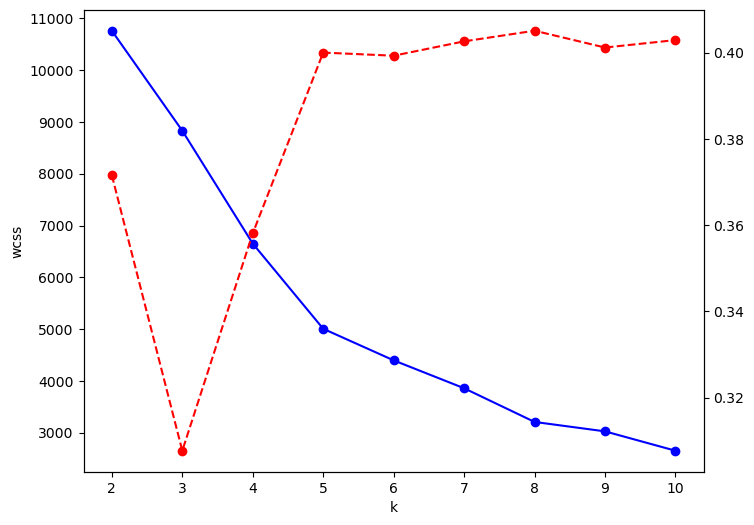

In [346]:
# Combined plot 
k_range=range(2,11)

fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.plot(k_range, wcss[1:], marker='o', color="blue")
ax1.set_xlabel("k")
ax1.set_ylabel("wcss")



ax2=ax1.twinx()
ax2.plot(k_range,scores[:len(k_range)], marker='o', color="red",linestyle='--')

# Clustering


In [347]:
# K_means
kmeans=KMeans(n_clusters=optimal_k,random_state=42)
labels_Kmeans=kmeans.fit_predict(X_pca)

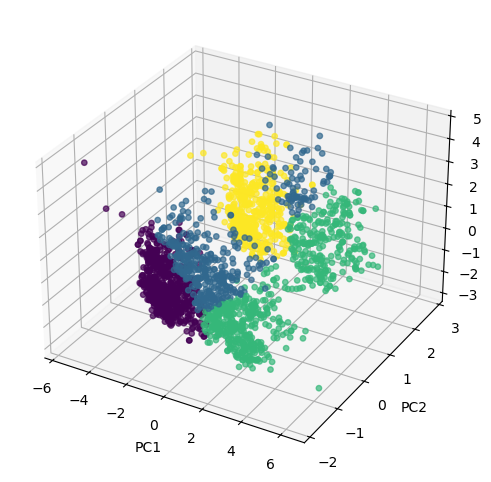

In [348]:
fig=plt.figure(figsize=(8,6))

ax=fig.add_subplot(111,projection="3d")
ax.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,2],c=labels_Kmeans,s=15,alpha=0.7,cmap="viridis")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

ax.set_zlabel("PC3")
plt.show()

In [349]:
#agglomerative clustering
from sklearn.cluster import AgglomerativeClustering


In [350]:
agg_clf=AgglomerativeClustering(n_clusters=4,linkage="ward")
labels_agg=agg_clf.fit_predict(X_pca)

Text(0.5, 0, 'PC3')

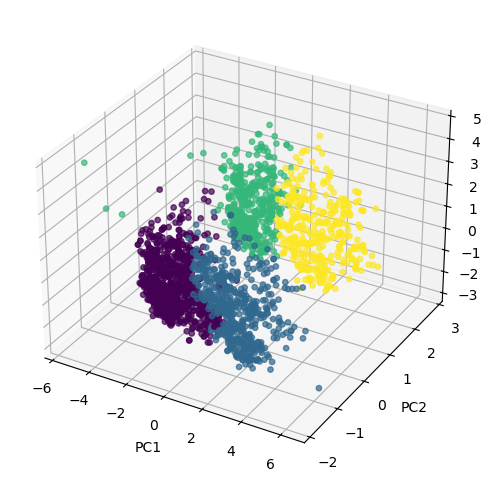

In [351]:
fig=plt.figure(figsize=(8,6))

ax=fig.add_subplot(111,projection="3d")
ax.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,2],c=labels_agg,s=15,alpha=0.7,cmap="viridis")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

ax.set_zlabel("PC3")

# Characterize the clusters

In [353]:

X["cluster"]=labels_agg


In [ ]:
df_cleaned.head()

,Education,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_Spending,Total_Children,Living_With,labels
0,Graduate,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,Alone,3
1,Graduate,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,Alone,2
2,Graduate,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,Partner,1
3,Graduate,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,Partner,0
4,PostGraduate,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,Partner,0


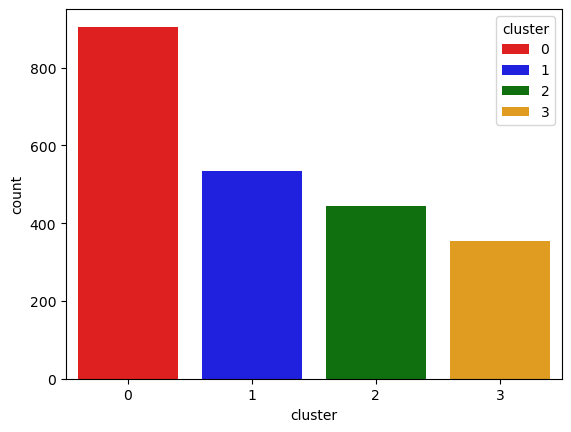

In [354]:
pal=["red","blue","green","orange"]
sns.countplot(x=X["cluster"],palette=pal,hue=X["cluster"])
plt.show()

<Axes: xlabel='Total_Spending', ylabel='Income'>

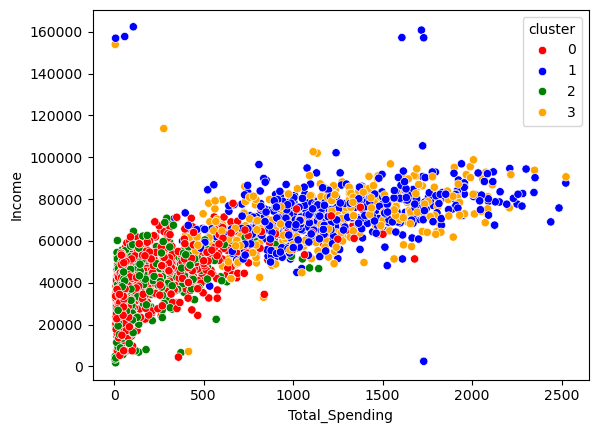

In [355]:
#income & spending patterns
sns.scatterplot(x=X["Total_Spending"],y=X["Income"],hue=X["cluster"],palette=pal)

In [356]:
# cluster Summary
cluster_summary=X.groupby("cluster").mean()
print(cluster_summary)

               Income    Recency  NumDealsPurchases  NumWebPurchases  \
cluster                                                                
0        39680.580110  48.914917           2.594475         3.153591   
1        72808.445693  49.202247           1.958801         5.687266   
2        36960.143018  48.319820           2.594595         2.713964   
3        70722.681303  50.504249           1.855524         5.790368   

         NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Complain  \
cluster                                                                        
0                   0.969061           4.143646           6.307182  0.011050   
1                   5.498127           8.659176           3.580524  0.005618   
2                   0.837838           3.623874           6.659910  0.011261   
3                   5.014164           8.430595           3.728045  0.005666   

         Response        Age  Customer_Tenure_Days  Total_Spending  \
cluster         